# Iris Flower Classification 

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Loading Dataset 

In [229]:
df=pd.read_csv('Iris.csv')

In [230]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [231]:
num_rows,num_col=df.shape
print("The total no of rows in the dataset=",num_rows)
print("The total no of columns in the dataset=",num_col)

The total no of rows in the dataset= 150
The total no of columns in the dataset= 5


In [232]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# we can see that the dataset has actually 150 rows of observation on 5 different variables namely
1.Sepal length
2.sepal width
3.petal length
4.petal width
5.speies

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Description of the dataset 

In [234]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [235]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [236]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Exploratory Data Analysis 

### Histogram of 4 variables

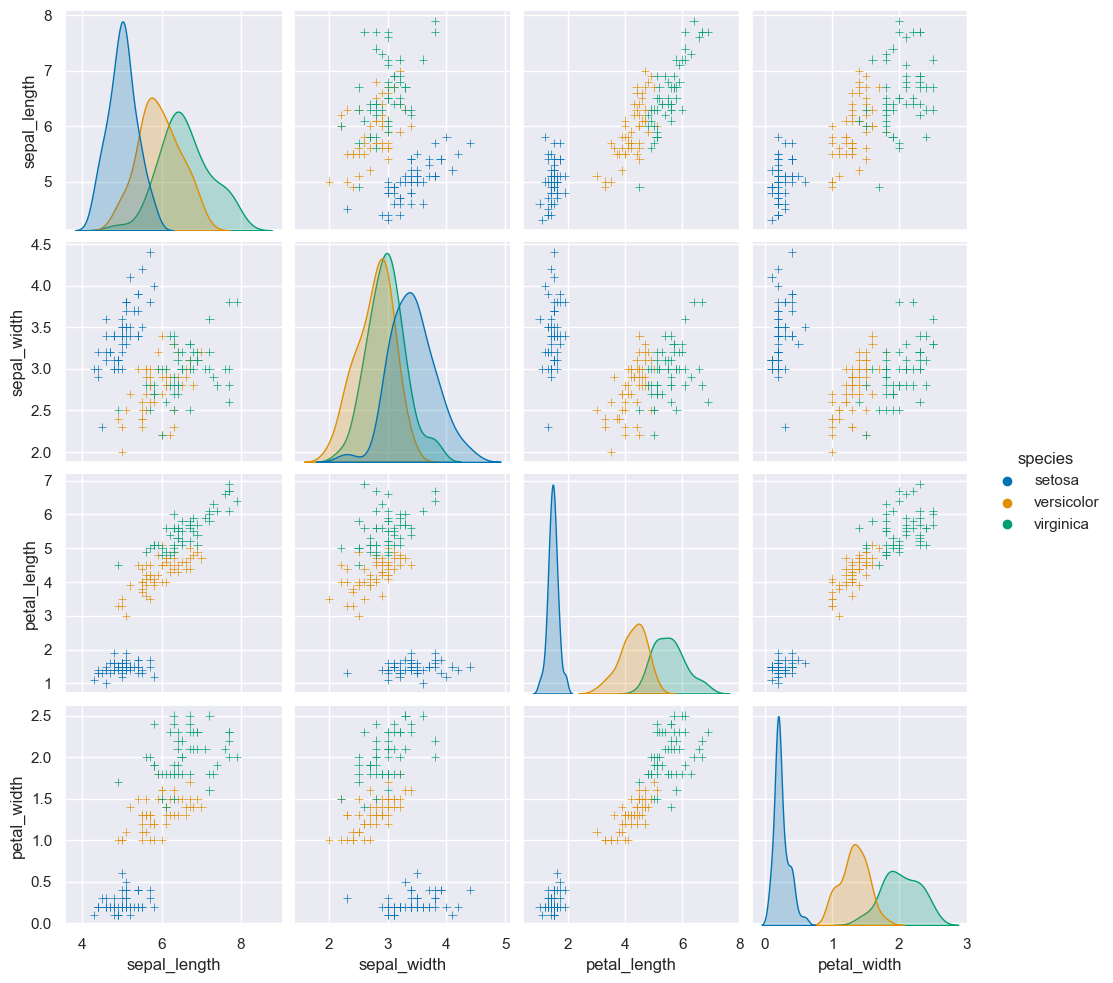

In [237]:
sns.pairplot(df, hue='species',markers='+', palette='colorblind')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4148\1810661718.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


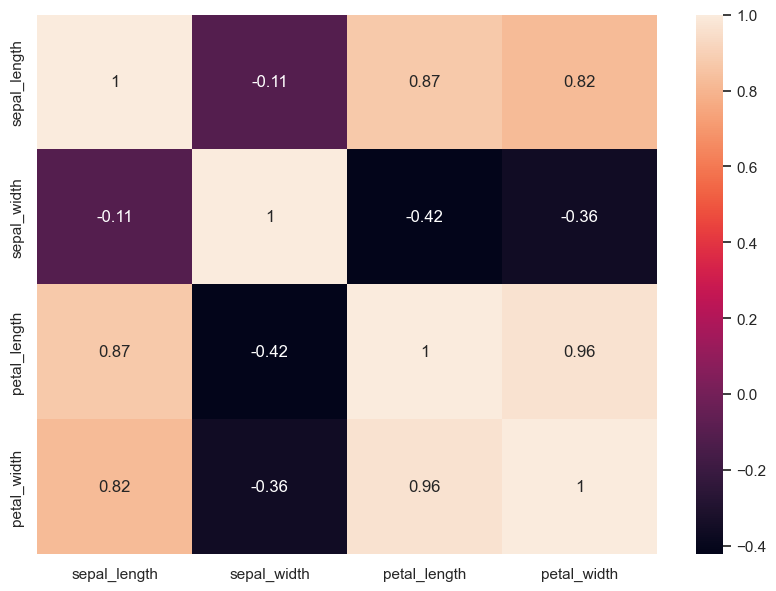

In [238]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building
## KNN:


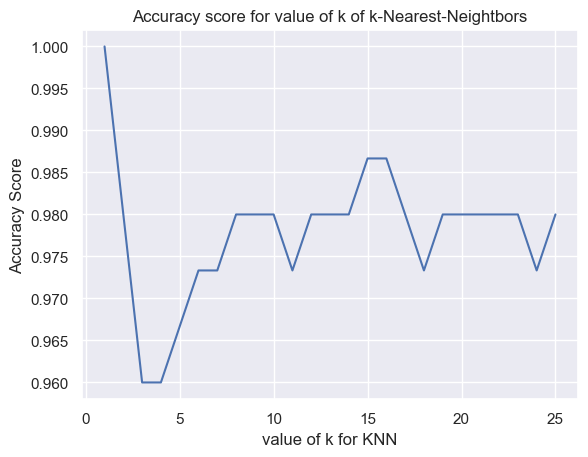

In [239]:
k_range = list(range(1,26))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y,y_pred))
plt.plot(k_range,scores)
plt.xlabel("value of k for KNN")
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for value of k of k-Nearest-Neightbors")
plt.show()

#  Logistic Regression

In [240]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_pred,y_test)
print("The accuracy of thr Logistic Regression is {:.2f} out of 1 test data".format(accuracy_score(y_pred, y_test)))

The accuracy of thr Logistic Regression is 1.00 out of 1 test data


In [241]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [242]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [243]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("test accuracy: {:.2f}%".format(dtree_acc*100))

test accuracy: 100.00%


In [244]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_pred,y_test)
print("the accuracy of the support vector classifier is {:.2f} out of 1 on test data".format (accuracy_score(y_pred, y_test)))

the accuracy of the support vector classifier is 1.00 out of 1 on test data


In [245]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [246]:
print(confusion_matrix(y_test, dtree_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.3076923076923077, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = ve

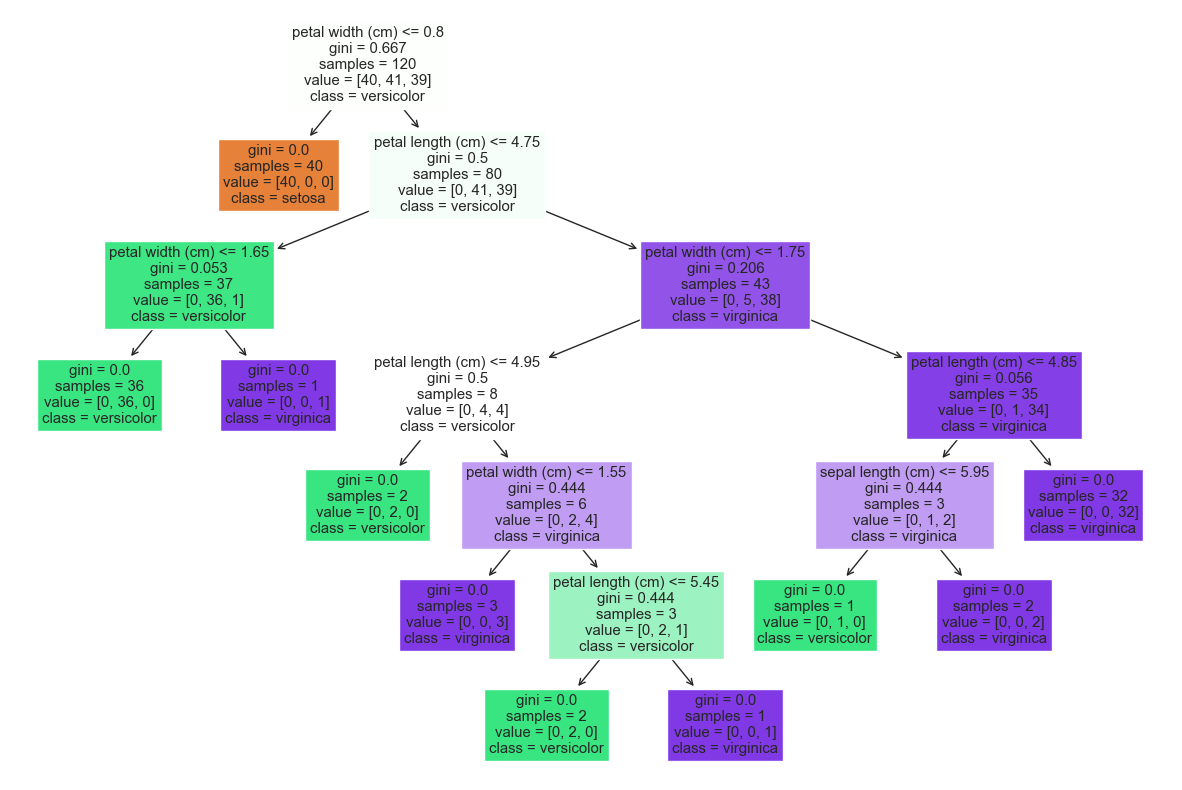

In [247]:
plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=iris_data.feature_names, class_names=iris_data.target_names.tolist(), filled=True)


In [248]:
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_acc= accuracy_score(knn_pred, y_test)
print("Test accyracy: {:.2f}%".format(knn_acc*100))

Test accyracy: 100.00%


In [249]:
print(confusion_matrix(y_test,knn_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [250]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [251]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [252]:
data = {'sepal length (cm)':5.0, 'sepal width (cm)':3.4, 'petal length (cm)':1.4,
       'petal width (cm)':0.2}
index=[0]
new_df = pd.DataFrame(data,index)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.4,0.2
